# HW4 - 爬取PTT文章
#### 【Python人工智慧實戰_2020-05-06】

### Please Crawl PTT content in the following page  
link: https://www.ptt.cc/bbs/movie/M.1586525586.A.891.html

In [1]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url = 'https://www.ptt.cc/bbs/movie/M.1586525586.A.891.html'

## write your code here
response = requests.get(url)
response.encoding = 'utf-8'

soup = BeautifulSoup(response.text, 'html.parser')
article = soup.find("div", {"id":"main-content"})
print(article)

<div class="bbs-screen bbs-content" id="main-content"><div class="article-metaline"><span class="article-meta-tag">作者</span><span class="article-meta-value">SUANG0213 (批踢踢蟲蟲)</span></div><div class="article-metaline-right"><span class="article-meta-tag">看板</span><span class="article-meta-value">movie</span></div><div class="article-metaline"><span class="article-meta-tag">標題</span><span class="article-meta-value">[請益] 一級玩家4DX 還是4DX 3D？</span></div><div class="article-metaline"><span class="article-meta-tag">時間</span><span class="article-meta-value">Fri Apr 10 21:33:04 2020</span></div>
大家安安
最近一級玩家重新上映了
聽大家都推爆4DX的版本
小弟真的超期待
但剛剛要訂票發現有還有4DX 3D的選項
因為自己沒看過太多3D片
想問如果是這部的話3D有那個價值直接看下去嗎
還是看一般的4DX就好？

--
<span class="f2">※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 39.12.94.50 (臺灣)
</span><span class="f2">※ 文章網址: <a href="https://www.ptt.cc/bbs/movie/M.1586525586.A.891.html" rel="nofollow" target="_blank">https://www.ptt.cc/bbs/movie/M.1586525586.A.891.html</a>
</span><span class="f2">※ 編輯: SUANG0213 (39.12.94.5

In [3]:
# remove all child html tags
for child_tag in article.findAll():
    child_tag.decompose()
print(article.text.strip())

大家安安
最近一級玩家重新上映了
聽大家都推爆4DX的版本
小弟真的超期待
但剛剛要訂票發現有還有4DX 3D的選項
因為自己沒看過太多3D片
想問如果是這部的話3D有那個價值直接看下去嗎
還是看一般的4DX就好？

--


In [4]:
# remove not use string
content = article.text.strip().replace("--","").strip()
print(content)

大家安安
最近一級玩家重新上映了
聽大家都推爆4DX的版本
小弟真的超期待
但剛剛要訂票發現有還有4DX 3D的選項
因為自己沒看過太多3D片
想問如果是這部的話3D有那個價值直接看下去嗎
還是看一般的4DX就好？


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.106 seconds.
Prefix dict has been built successfully.


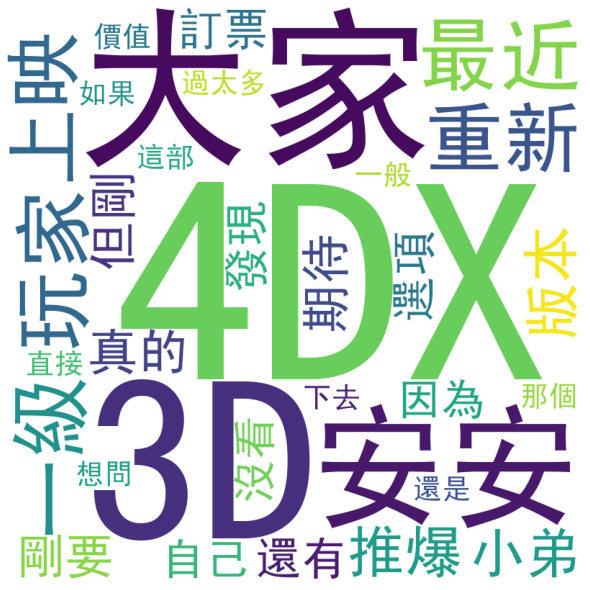

In [5]:
%matplotlib inline
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt 

## write your code here
words = " ".join(jieba.cut(content, cut_all=False))

## show chinese in wordcloud: use WordCloud(font_path='simhei.ttf', ......)
wordcloud = WordCloud(width = 800, height = 800, 
                      font_path='simhei.ttf',
                      background_color ='white',
                      stopwords = None,
                      min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()